In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# import statsmodels.formula.api as smf


# import sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

PROBLEM STATEMENT:  
     Salary_hike -> Build a prediction model for Salary_hike


In [3]:
data = pd.read_csv('Salary_Data.csv')

In [4]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data.shape

(30, 2)

# EDA and Data Visualization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

5.3133333333333335


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

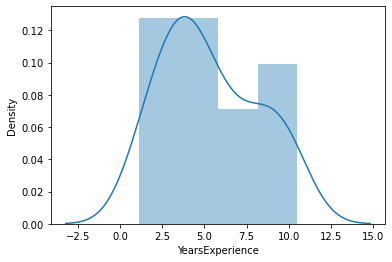

In [8]:
#Distribution of the Data using Density plot wrt Sorting Time(X variable)
print(data['YearsExperience'].mean())
sns.distplot(data['YearsExperience'])

76003.0


<AxesSubplot:xlabel='Salary', ylabel='Density'>

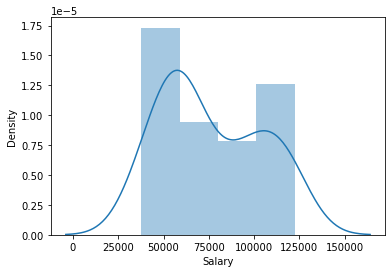

In [9]:
#Distribution of the Data wrt Delivery Time(Y variable)
print(data['Salary'].mean())
sns.distplot(data['Salary'])

# Correlation analysis

In [11]:
#Undesrtanding the Correlation 
data.corr()  # here they are 97 percent so its high positively corelated(Very Close to +1)

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


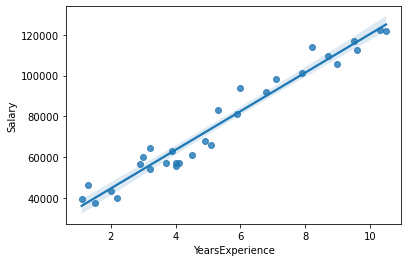

In [12]:
#Another way understanding correlation Using regression plot plotting the best fit line along with the datapoints
#and the shade is the Confidence interval (95% is that it will lie in that shade)
    
sns.regplot(x="YearsExperience", y="Salary", data=data);

#  Model Building :Statsmodel

In [13]:
# To Fit a line we import  below:  statsmodels is package its in api

import statsmodels.formula.api as smf

In [14]:
# This code is just that to Treat Whatever before ~ is Y variable and after ~ it is X variable
# Using  OLS (ordinary lead Square method) for ßo & ß1  

model = smf.ols("Salary~YearsExperience",data = data).fit() 

# Model Testing

In [15]:
# Beta Coefficients

model.params 

# ßo=25792.20  ß1=9449.96

#Interpretation of YearsExperience beta coefficient
#For every unit increase in YearsExperience value, the value for Salary will increase by 9449.96
# Given a unit increase in YearsExperience variable, The Salary variable increases by 9449.96 since it is a positive beta coefficient for YearsExperience variable.


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [18]:
# Finding Pvalues and tvalues

#To prove the Hypothesis
#                      slope(ß1)
#here Hypothesis says  Ho: ß1 = 0
#                      Ha :ß1 != 0 { here the pValue of YearsExperience is 0.00..1 <<< {α}0.05 } so Ho Rejected and Ha accepted

model.tvalues, model.pvalues


#'''Since p-value(YearsExperience) is less than << 0.05  for 'YearsExperience' variable,
#We can say that it is a significant variable in predicting the dependent variable 'Salary'

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [19]:
#R squared values
model.rsquared  #model.rsquared_adj

#95% of variation in the dependent variable is explained by the given independent variable
#95% is the Best accuracy r² value

0.9569566641435086

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 18 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        10:06:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions


In [23]:
# Manual prediction for say 4 Years Experience
Salary = (25792.200199) + (9449.962321)*(4.0)
Salary

63592.049483

In [24]:
# Manual prediction for say 6 Years Experience
Salary = (25792.200199) + (9449.962321)*(6.0)
Salary

82491.97412500001

In [25]:
# Automatic Prediction for say 3,4,5,6 Years Experience 
new_data=pd.Series([3.0,4.0,5.0,6.0])
new_data

0    3.0
1    4.0
2    5.0
3    6.0
dtype: float64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3.0
1,4.0
2,5.0
3,6.0


In [27]:
model.predict(data_pred)

0    54142.087163
1    63592.049484
2    73042.011806
3    82491.974127
dtype: float64